<a href="https://colab.research.google.com/github/Avuraedor/Avuraedor/blob/main/Machine_Learning_Model_By_Avura_Edor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, SVC
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [8]:
df= pd.read_csv('/content/Fake.csv')

<ipython-input-8-6b951856cb6d>:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/Fake.csv')


In [9]:
df.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# List all columns
print(df.columns)

# Identify unnamed columns
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]

# Check NaN percentage in unnamed columns
for col in unnamed_columns:
    print(f"{col}: {df[col].isna().sum() / len(df) * 100:.2f}% NaN values")

Index(['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165',
       'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169',
       'Unnamed: 170', 'Unnamed: 171'],
      dtype='object', length=172)
Unnamed: 4: 99.91% NaN values
Unnamed: 5: 99.91% NaN values
Unnamed: 6: 99.91% NaN values
Unnamed: 7: 99.91% NaN values
Unnamed: 8: 99.92% NaN values
Unnamed: 9: 99.92% NaN values
Unnamed: 10: 99.92% NaN values
Unnamed: 11: 99.92% NaN values
Unnamed: 12: 99.92% NaN values
Unnamed: 13: 99.92% NaN values
Unnamed: 14: 99.92% NaN values
Unnamed: 15: 99.92% NaN values
Unnamed: 16: 99.92% NaN values
Unnamed: 17: 99.92% NaN values
Unnamed: 18: 99.92% NaN values
Unnamed: 19: 99.92% NaN values
Unnamed: 20: 99.92% NaN values
Unnamed: 21: 99.92% NaN values
Unnamed: 22: 99.93% NaN values
Unnamed: 23: 99.93% NaN values
Unnamed: 24: 99.93% NaN v

In [11]:
# Drop unnamed columns with NaN values
df.drop(columns=unnamed_columns, inplace=True)

# Verify the columns have been dropped
print(df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  
0  Donald Trump just couldn t wish all Americans ...    News  31-Dec-17  
1  House Intelligence Committee Chairman Devin Nu...    News  31-Dec-17  
2  On Friday, it was revealed that former Milwauk...    News  30-Dec-17  
3  On Christmas day, Donald Trump announced that ...    News  29-Dec-17  
4  Pope Francis used his annual Christmas Day mes...    News  25-Dec-17  


In [12]:
# Check for remaining NaN values
df.isnull().sum()

title       0
text        0
subject    21
date       21
dtype: int64

In [13]:
# Fill NaN values with mean for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle NaN values in non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=np.number).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna('')

# Verify that there are no more NaN values in numeric columns
print(df[numeric_cols].isna().sum())

Series([], dtype: float64)


In [14]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [15]:
df.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17


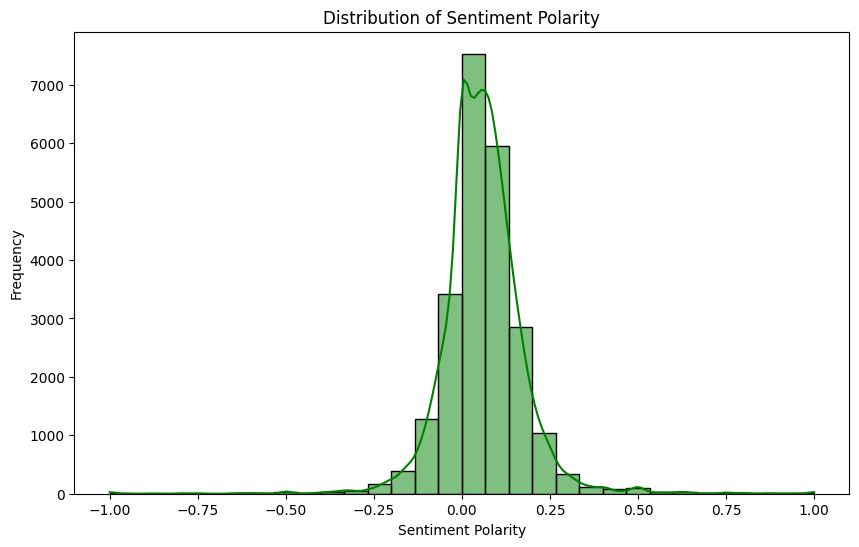

In [17]:
from textblob import TextBlob

# Calculate sentiment polarity
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='green')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Insights gathered from above indicates the following:
1. Central Tendency:
The sentiment polarity is centered around 0, indicating a neutral sentiment on average.

There is a slight skew towards the negative side, as indicated by the longer tail on the left.

2. Distribution Spread:
The majority of the sentiment polarity values are concentrated between -0.25 and 0.25.

There are very few articles with extreme sentiment polarity (values close to -1 or 1).

3. Frequency Peaks:
The highest frequency of articles has sentiment polarity close to 0, suggesting that many articles are either neutral or balanced in sentiment.

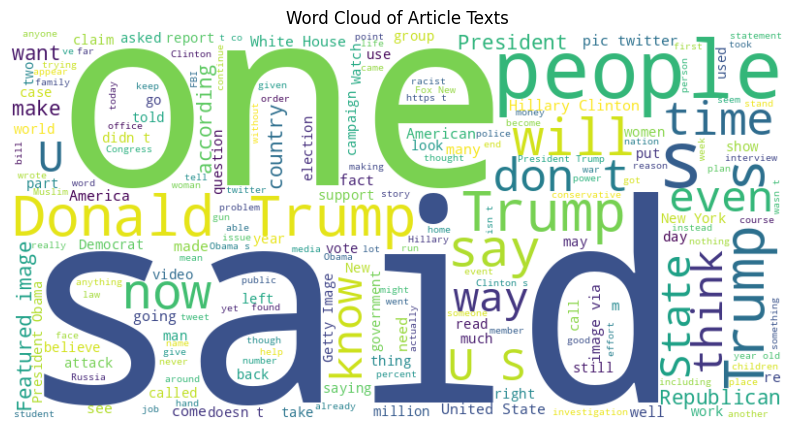

In [18]:
from wordcloud import WordCloud

# Combine all texts into a single string
texts = " ".join(df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Texts')
plt.show()

# Insights gathered from above indicate the following:

1. Prominent Words:
"one," "people," "said," "Trump," "Donald Trump": These words are significantly larger, indicating their high frequency in the text. The focus on Donald Trump suggests that many articles revolve around him or events related to him.

"state," "time," "think," "will": These are also common, but not as frequent as the most prominent words.

2. Themes and Context:
Political Figures and Entities:
The frequent mention of political figures like Donald Trump and political terms indicates a strong focus on political content.

Emotional and Opinionated Words:
Words like "think," "say," "will," "time," and "people" suggest that the articles might be subjective, containing personal opinions or projections, which is often seen in opinion pieces or biased reporting.

Lack of Varied Vocabulary:
The repetitive use of certain words can indicate a lack of depth and diversity in content, which might be a characteristic of low-quality or fake news.

<ipython-input-20-c7fc05a33e2c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')


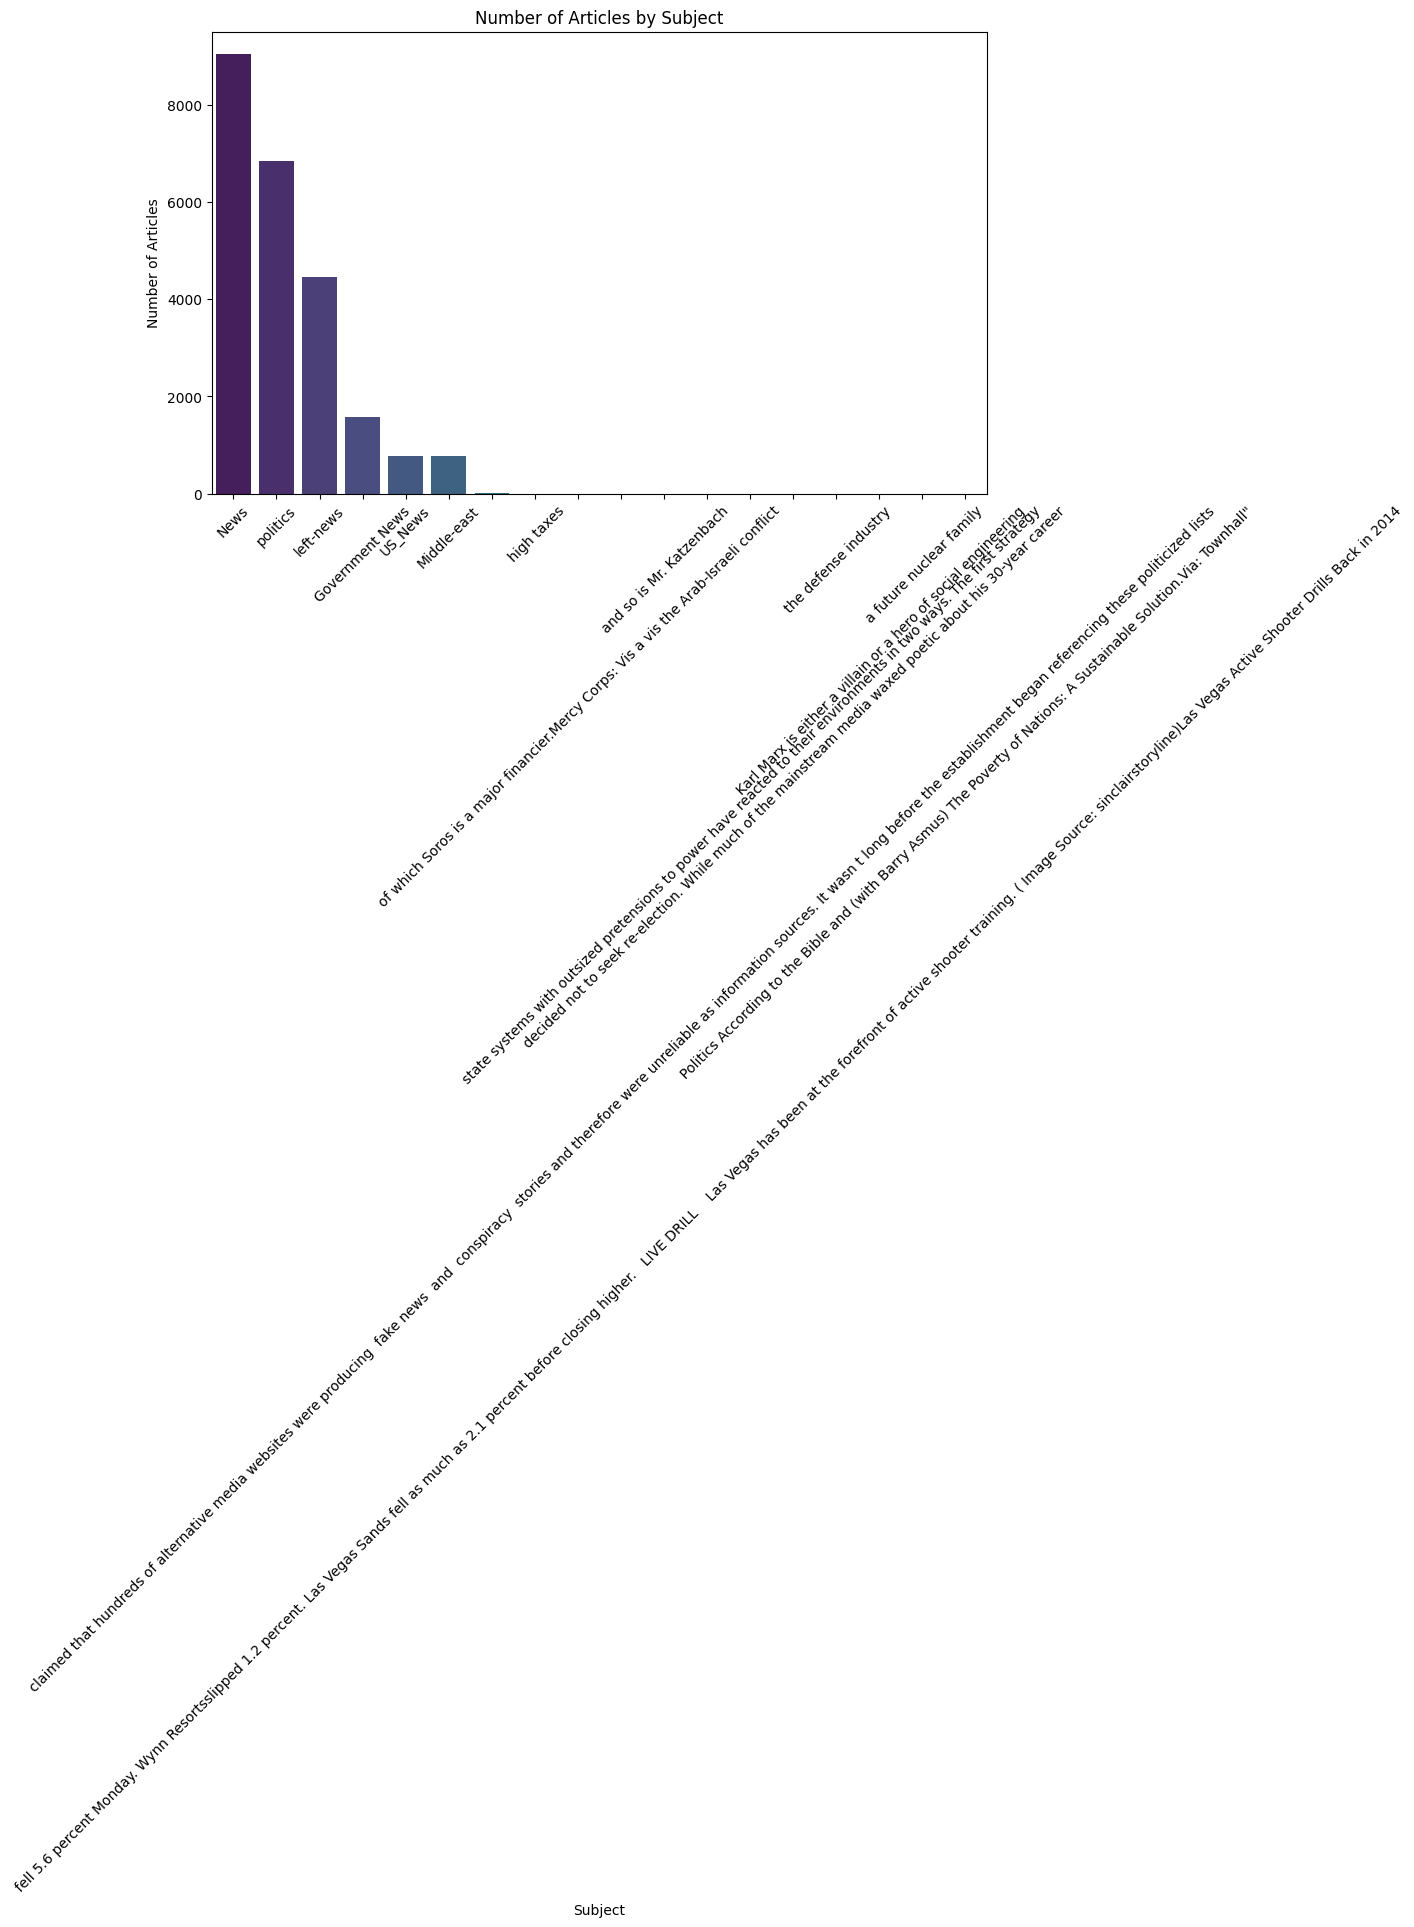

In [20]:
# Count the number of articles per subject
subject_counts = df['subject'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.title('Number of Articles by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# The insights gotten from Analyzing the Number of Articles by Subject indicates as follows:
1. Dominance of 'News' and 'Politics':
The majority of the articles fall under the 'News' and 'Politics' categories.

This could indicate a focus on current events and political topics, which are often subjects of interest and debate.

2. Lower Counts for Other Subjects:
Other categories like 'left-news', 'Government News', and 'US News' have significantly fewer articles.

Subjects such as 'high taxes', 'Middle east', and 'the defense industry' have the least number of articles, indicating less coverage or interest in these topics.

3. Anomalies in the Data:
The presence of very long and unusual subject labels towards the right end of the chart suggests possible data quality issues.
These labels seem to be improperly parsed or concatenated text, not actual subject categories.

In [26]:
# Encode the categorical code

cat_col = ('date', 'subject', 'text', 'title')
from sklearn.preprocessing import LabelEncoder

In [28]:
# Iterate ==> Fit ==> Transform
for col in cat_col:
    # Create an object
    enc = LabelEncoder()

    # Fit
    enc.fit(df[col])

    # Tansform
    df[col] = enc.transform(df[col])

In [29]:
df.head(1)

,title,text,subject,date,text_length,sentiment
0,1695,4506,14,809,495,0.082132


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23502 entries, 0 to 23501
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        23502 non-null  int64  
 1   text         23502 non-null  int64  
 2   subject      23502 non-null  int64  
 3   date         23502 non-null  int64  
 4   text_length  23502 non-null  int64  
 5   sentiment    23502 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 1.1 MB


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
x = df.drop('sentiment', axis=1)
y = df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Now you can scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred = logreg.predict(x_test)
print(classification_report(y_test, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          50       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [45]:
# Decision Tree

dtcr = DecisionTreeClassifier()
dtcr.fit(x_train, y_train)

pred=dtcr.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.43      0.75      0.55         4
          18       1.00      1.00      1.00         1
          22       0.00      0.00      0.00         1
          27       1.00      1.00      1.00         1
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          35       1.00      1.00      1.00         1
          37       1.00      1.00      1.00         1
          39       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.